**COMP 472 Project 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import math
from sklearn import tree
from sklearn import preprocessing
import graphviz

In [ ]:
url = 'https://raw.githubusercontent.com/CombatLawyer/COMP472/main/data.csv' 
df = pd.read_csv(url)

In [ ]:
print(df)

   Unnamed: 0  Alt  Bar  Fri  Hun   Pat Price Rain  Res     Type    Est  \
0          x1  Yes   No   No  Yes  Some   $$$   No  Yes   French   0-10   
1          x2  Yes   No   No  Yes  Full     $   No   No     Thai  30-60   
2          x3   No  Yes   No   No  Some     $   No   No   Burger   0-10   
3          x4  Yes   No  Yes  Yes  Full     $  Yes   No     Thai  30-60   
4          x5  Yes   No  Yes   No  Full   $$$   No  Yes   French    >60   
5          x6   No  Yes   No  Yes  Some    $$  Yes  Yes  Italian   0-10   
6          x7   No  Yes   No   No  None     $  Yes   No   Burger   0-10   
7          x8   No   No   No  Yes  Some    $$  Yes  Yes     Thai   0-10   
8          x9   No  Yes  Yes   No  Full     $  Yes   No   Burger    >60   
9         x10  Yes  Yes  Yes  Yes  Full   $$$   No  Yes  Italian  30-60   
10        x11   No   No   No   No  None     $   No   No     Thai   0-10   
11        x12  Yes  Yes  Yes  Yes  Full     $   No   No   Burger  30-60   

   WillWait  
0       Ye

In [ ]:
def calculate_entropy(dataset):
    entropy_values = []

    # Calculate the total count of instances
    total_count = len(dataset)

    # Exclude the first column
    columns = dataset.columns[1:-1]

    # Iterate over each column in the datatset
    for column in columns:

        # Take the dataset by the sepcific column and the last column (only the column and the class label)
        column_values = dataset[[column, dataset.columns[-1]]]

        # Determine the unique values in the column
        values = dataset[column].unique()

        # For every unique value
        for uniqueValue in values:

            # For the given unique value take only the class label
            filteredValues = column_values[column_values[column] == uniqueValue][column_values.columns[-1]]

            # The probability of a given class label is then taken by finding the individual count of the label divided by the length of the filtered dataset
            probabilities = filteredValues.value_counts() / len(filteredValues)

            # Entropy is then calculated (+ 0 is used to correct for negative 0 values)
            entropy = - (probabilities * probabilities.apply(math.log2)).sum() + 0

            # Result is stored as a tuple into the list
            entropy_values.append((column, uniqueValue, entropy))

    # Handle the last column separately
    last_column = dataset.columns[-1]
    last_column_values = dataset[last_column]

    # Convert all values in the last column to lowercase
    last_column_values = last_column_values.str.lower()

    # Calculate the total count of "yes" and "no" in the last column
    total_yes_count = last_column_values.str.contains('yes').sum()
    total_no_count = last_column_values.str.contains('no').sum()
    # Calculate the total probability of "yes" and "no"
    total_yes_probability = total_yes_count / total_count
    total_no_probability = total_no_count / total_count

    # Calculate the entropy for the last column based on the total probabilities of "yes" and "no"
    final = 0.0
    if total_yes_probability != 0:
        final -= total_yes_probability * math.log2(total_yes_probability)
    if total_no_probability != 0:
        final -= total_no_probability * math.log2(total_no_probability)
    return final,entropy_values

final_entropy, entropies = calculate_entropy(df)
print("Entropy values:")
for entropyTuple in entropies:
    print(f'{entropyTuple[0]} = {entropyTuple[1]}: {entropyTuple[2]}')
print("final_entropy",final_entropy)

Entropy values:
Alt = Yes: 1.0
Alt = No: 1.0
Bar = No: 1.0
Bar = Yes: 1.0
Fri = No: 0.9852281360342515
Fri = Yes: 0.9709505944546686
Hun = Yes: 0.863120568566631
Hun = No: 0.7219280948873623
Pat = Some: 0.0
Pat = Full: 0.9182958340544896
Pat = None: 0.0
Price = $$$: 0.9182958340544896
Price = $: 0.9852281360342515
Price = $$: 0.0
Rain = No: 0.9852281360342515
Rain = Yes: 0.9709505944546686
Res = Yes: 0.9709505944546686
Res = No: 0.9852281360342515
Type = French: 1.0
Type = Thai: 1.0
Type = Burger: 1.0
Type = Italian: 1.0
Est = 0-10: 0.9182958340544896
Est = 30-60: 1.0
Est = >60: 0.0
final_entropy 1.0


In [ ]:
def findBestGain(dataset):
  # Remove the first and the last column (x labels and class labels)
  features = dataset.iloc[:,1:-1]

  # Used to keep track of the current best gain
  bestGain = 0 # Starts at 0 to ensure any gain larger will register
  bestFeature = "" # Returns an empty string if all features provide no larger gain

  # For each feature column find entropies
  for col in features.columns:

    # Begin gain at 1
    gain = 1

    # For each different value of each feature reduce the gain by the amount of entropy of the feature scaled
    for value in dataset[col].unique():
      gain -= calculate_entropy(dataset[dataset[col] == value])[0] * len(dataset[dataset[col] == value]) / len(dataset)
    
    # If the gain is larger than the previous best, save the name of the feature that results in the best gain
    if gain > bestGain:
      bestGain = gain
      bestFeature = col

  # Return the feature which allows the biggest gain when splitting on
  return bestFeature

findBestGain(df)

'Pat'

Class labels has been reassigned to the tree. See mytree1.pdf


([Text(0.6, 0.9, 'x[4] <= 1.5\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
  Text(0.4, 0.7, 'x[3] <= 0.5\nentropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
  Text(0.2, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
  Text(0.6, 0.5, 'x[7] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
  Text(0.4, 0.3, 'x[2] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
  Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
  Text(0.6, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
  Text(0.8, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
  Text(0.8, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')],
 DecisionTreeClassifier(criterion='entropy'),
 {0: LabelEncoder(),
  1: LabelEncoder(),
  2: LabelEncoder(),
  3: LabelEncoder(),
  4: LabelEncoder(),
  5: LabelEncoder(),
  6: LabelEncoder(),
  7: LabelEncoder(),
  8: LabelEncoder(),
  9: LabelEncoder()})

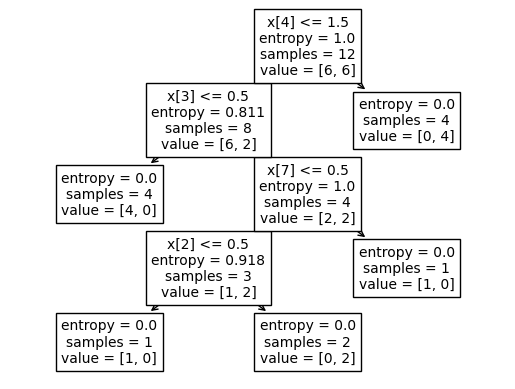

In [ ]:
# Function that takes in a dataset and label encodes each columns' data 
# to then create a classifier object using entropy as the criterion in order to build a decision tree
# it also creates a file with the proper associated class labels named "mytree1.pdf"
def train_using_entropy(dataset):
  # Retrieve our features and target
  features = dataset.iloc[:,1:-1].values
  target = dataset.iloc[:, -1].values

  # Convert all non numerical columns to numerical values
  le = preprocessing.LabelEncoder()

  # Loop to label encode each column for the feature vector
  encoders = {}
  for i in range(len(features[0])):
      encoders[i] = preprocessing.LabelEncoder()
      features[:, i] = encoders[i].fit_transform(features[:, i])
  target = le.fit_transform(target)
  
  # Create classifier object using entropy as the criterion
  dtc = tree.DecisionTreeClassifier(criterion="entropy")

  # Train classifier to build the tree
  dtc.fit(features, target)

  # Export the tree to a file and reassign tree labels
  dot_data = tree.export_graphviz(dtc, out_file=None,
  feature_names=['Alt',  'Bar',  'Fri',  'Hun',   'Pat', 'Price', 'Rain',  'Res', 'Type', 'Est'],
  class_names=le.classes_,
  filled=True, rounded=True)
  graph = graphviz.Source(dot_data)
  graph.render("mytree1")

  print("Class labels has been reassigned to the tree. See mytree1.pdf")

  # Return the tree
  return tree.plot_tree(dtc), dtc, encoders

train_using_entropy(df)

Welcome to our decision tree program!
Do you wish to provide a csv file for your dataset ? (answer y/n) y
Please provide the path to the csv which contains your dataset. Make sure that the syntax for your dataset is proper! https://raw.githubusercontent.com/CombatLawyer/COMP472/main/data.csv
Calculating entropy for the given dataset
Alt = Yes: 1.0
Alt = No: 1.0
Bar = No: 1.0
Bar = Yes: 1.0
Fri = No: 0.9852281360342515
Fri = Yes: 0.9709505944546686
Hun = Yes: 0.863120568566631
Hun = No: 0.7219280948873623
Pat = Some: 0.0
Pat = Full: 0.9182958340544896
Pat = None: 0.0
Price = $$$: 0.9182958340544896
Price = $: 0.9852281360342515
Price = $$: 0.0
Rain = No: 0.9852281360342515
Rain = Yes: 0.9709505944546686
Res = Yes: 0.9709505944546686
Res = No: 0.9852281360342515
Type = French: 1.0
Type = Thai: 1.0
Type = Burger: 1.0
Type = Italian: 1.0
Est = 0-10: 0.9182958340544896
Est = 30-60: 1.0
Est = >60: 0.0
final_entropy 1.0
Finding the best gain for the given dataset
Pat
Creating the decision tre

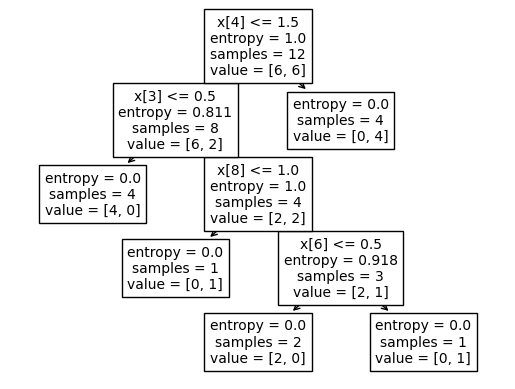

In [46]:
# Code for demo 
def demoRundown():
  print("Welcome to our decision tree program!")

  # Let user provide dataset manually or through a csv file url
  answer = input("Do you wish to provide a csv file for your dataset ? (answer y/n) ")

  # Csv file method for dataset
  if answer in ['y', 'Y', 'yes', 'Yes', 'YES']:
    filename = input("Please provide the path to the csv which contains your dataset. Make sure that the syntax for your dataset is proper! ")
    try:
      dataset = pd.read_csv(filename)
    except Exception:
      print("Could not read csv file, try checking the file again.")
  # Manual method for dataset
  else:
    dataset = input("Please provide the dataset manually. Make sure that the syntax for your dataset is proper!")

  # Calculate the entropy using the provided dataset
  try:
    print("Calculating entropy for the given dataset")
    final_entropy, entropies = calculate_entropy(dataset)
    for entropyTuple in entropies:
      print(f'{entropyTuple[0]} = {entropyTuple[1]}: {entropyTuple[2]}')
    print("final_entropy",final_entropy)
  except Exception:
    print("Could not calculate the entropy...")
  
  # Find the best gain
  try:
    print("Finding the best gain for the given dataset")
    print(findBestGain(dataset))
  except Exception:
    print("Could not find the best gain...")
  
  # Draw the tree using entropy as the criterion
  try:
    print("Creating the decision tree for the given dataset")
    tree, dtc, encoders = train_using_entropy(dataset)
  except Exception:
    print("Could not create the decision tree...")

  # Provide oppurtunity to input data
  decision = input("Do you wish to classify some data? (y/n) ")

  if decision in ['y', 'Y', 'yes', 'Yes', 'YES']:
    decision = input("Please specify a format for the data you wish to classify. (Manual or csv) ")
    if decision.lower() == 'manual':

      # Manual data entry
      print("Please enter the data point with the features.")
      data = []
      data.append(input("Was there an alternative dining spot lined up (Yes/No): ").capitalize())
      data.append(input("Is there a bar (Yes/No): ").capitalize())
      data.append(input("Is it a Friday (Yes/No): ").capitalize())
      data.append(input("Are the customers hungry (Yes/No): ").capitalize())
      data.append(input("Are there other patrons (None/Some/Full): ").capitalize())
      data.append(input("What price point were they expecting ($/$$/$$$): "))
      data.append(input("Was it raining (Yes/No): ").capitalize())
      data.append(input("Did they have a reservation (Yes/No): ").capitalize())
      data.append(input("What kind of food were they ordering (Burger/French/Italian/Thai): ").capitalize())
      data.append(input("What was the estimated wait time (0-10/10-30/30-60/>60): "))

      # Using the encoders which previously were used to build the tree, encode this new data point
      data = np.array(data).reshape(1, -1)
      for i in range(len(data[0])):
        data[:, i] = encoders[i].transform(data[:, i])
      
      # Prediction translated from encoding
      if dtc.predict(data)[0] == 1:
        print("The prediction is that the customers will stay and wait for a table. (encoded as 1)")
      else:
        print("The prediction is that the customers will not stay. (encoded as 0)")

    # Importing data using a csv file
    elif decision.lower() == 'csv':
      classify = input("Please provide the path to the csv which contains the data to classify. Make sure that the syntax for your dataset is proper! ")
      classify = pd.read_csv(classify).values

      # Using the encoders which previously were used to build the tree, encode this new data point
      for i in range(len(classify[0])):
        classify[:, i] = encoders[i].transform(classify[:, i])

      # Prediction translated from encoding
      predictions = dtc.predict(classify)
      for i in range(len(predictions)):
        if predictions[i] == 1:
          print(f"Customer {i + 1} will likely stay and wait for a table. (encoded as 1)")
        else:
          print(f"Customer {i + 1} will likely not stay. (encoded as 0)")

    else:
      print("Invalid input please restart.")
  elif decision in ['n', 'N', 'no', 'No', 'NO']:
    print("Thank you for using the decision tree program.")
  else:
    print("Invalid input, terminating program.")

demoRundown()

# New Section